In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
from datetime import timedelta

%matplotlib inline
sns.set_style('white')

In [2]:
#download the patchseq log as an excep spreadsheet and drop it in this folder
df_mouse = pd.read_excel('Patch-seq log.xlsx','Mouse PatchSeq', parse_cols = 'B:I, K, O, P, R:T, Y, AF, AV:BN')

#human log needs some cleaning up before it can line to to mouse so keep this commented out for now
#df_human = pd.read_excel('Patch-seq log.xlsx','Human PatchSeq', parse_cols = 'B:I, K, O, P, R:T, Y, AF, AV:BN')
#df = pd.concat([df_mouse, df_human])
df = df_mouse


### Clean up the data

In [3]:
layer_dic = {
    '1': 'layer 1',
    'I': 'layer 1',
    'layer 1': 'layer 1',
    '2': 'layer 2/3',
    'II': 'layer 2/3', 
    '2018-02-03 00:00:00': 'layer 2/3',
    'III': 'layer 2/3', 
    'p2/3': 'layer 2/3', 
    '3': 'layer 2/3',
    'layer 2/3': 'layer 2/3',
    '4': 'layer 4', 
    'IV': 'layer 4',
    'p4': 'layer 4',
    'layer 4': 'layer 4',
    '5': 'layer 5', 
    'V': 'layer 5',
    'p5': 'layer 5', 
    'layer 5': 'layer 5',
    '5a': 'layer 5a',
    '6': 'layer 6', 
    'VI': 'layer 6', 
    '6a': 'layer 6a',
    '6b': 'layer 6b', 
    'layer 6': 'layer 6',
    'layer 6a': 'layer 6a',
    'layer 6b': 'layer 6b',
    'None': None,
    'nan': None,
    'na': None,
    'missing' : None  
}
#df['Layer'] = df['Layer'].map(lambda x: layer_dic[str(x)])

controls = [
    'aCSF (bath) control', 'aCSF (slice carousel) control', 'blank control'
]

df = df[~df['File'].isin(controls)]

df['patch duration'] = df['patch duration'].map(lambda x: float(x))

df = df[df['User'] != 'P0']
df = df[df['Ratio >400/total'] <= 1]


df['Date'] = df['Date'].apply(lambda x: None if x > 190101 else x)
df['Date'] = df['Date'].fillna(0)
df['date_format'] = df['Date'].map(lambda x: pd.to_datetime(str(int(x)), format = '%y%m%d'))

outcome_dic = {
    'No-Seal' : 'No-Seal',
    'Partial-Nucleus': 'Partial-Nucleus',
    'Outside-Out': 'Outside-Out',
    'nr': 'missing',
    'Nucleated': 'Nucleated',
    'Nucleus': 'Nucleated',
    'Entire-Cell': 'Entire-Cell',
    'Entire cell': 'Entire-Cell',
    'outside-out':'Outside-Out',
    'Outside-Out?': 'Outside-Out',
    'Outside-out': 'Outside-Out',
    'no-seal': 'No-Seal',
    'nucelated': 'Nucleated',
    'no -seal': 'No-Seal',
    'missing': 'missing',
    'nan': 'missing',
    'nucleus_absent': 'Partial-Nucleus',
    'nucleus_present': 'Nucleated',
    'no_nucleus_visible': 'No-Seal',
    'nucleus_visible': 'No-Seal',
    'entire_cell': 'Entire-Cell'
    }


user_dic = {
    'P1': 'P1',
    'P2': 'P2',
    'P3': 'P3',
    'P4': 'P4',
    'P5': 'P5',
    'P6': 'P6',
    'P6 ': 'P6',
    'P8': 'P8',
    'P9': 'P9',
    'PA': 'PA',
    'PB': 'PB'
}

morph_dic = {
    'n': 'No',
    'z': 'N/A',
    'y': 'Yes',
    'na': 'N/A',
    ' n': 'No',
    'q': 'Questionable',
    'x': 'Yes',
    '?': 'Questionable',
    'processing' : 'Yes',
    'check with aaron': 'Questionable',
    't': 'Yes'
}


df['Post patch?'] = df['Post patch?'].fillna('missing')
df['Post patch?'] = df['Post patch?'].map(lambda x: outcome_dic[x])

df['Morph'] = df['Morph'].fillna('n')
df['patch duration'] = df['patch duration'].fillna(0)

df['User'] = df['User'].map(lambda x: user_dic[x])
df['Morph'] = df['Morph'].map(lambda x: morph_dic[x])

df['Month'] = df['date_format'].map(lambda x: x.month)
df['week'] = df['date_format'].map(lambda x: x.week)
df['year'] = df['date_format'].map(lambda x: x.year)

C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
#this will come in handy

colors = {
    'P1': '#a6cee3',
    'P2': '#1f78b4',
    'P3': '#b2df8a',
    'P4': '#33a02c',
    'P5': '#fb9a99',
    'P6': '#e31a1c',
    'P8': '#fdbf6f',
    'P9': '#ff7f00',
    'PA': '#cab2d6',
    'PB': '#6a3d9a'
}

# The World's Your Oyster on What Look at

### cDNA by User for entire dataset

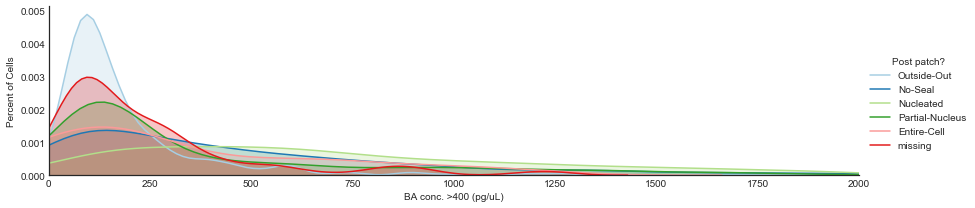

In [28]:
# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(df[df['BA conc. >400 (pg/uL)'] < 2000], hue="Post patch?",aspect = 4, palette = 'Paired')

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'BA conc. >400 (pg/uL)',shade= True)

# Set the x max limit by the oldest passenger
oldest = df['BA conc. >400 (pg/uL)'].max()
oldest = 2000
#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))
plt.ylabel('Percent of Cells')
#Finally add a legend
fig.add_legend()

(-100, 5000)

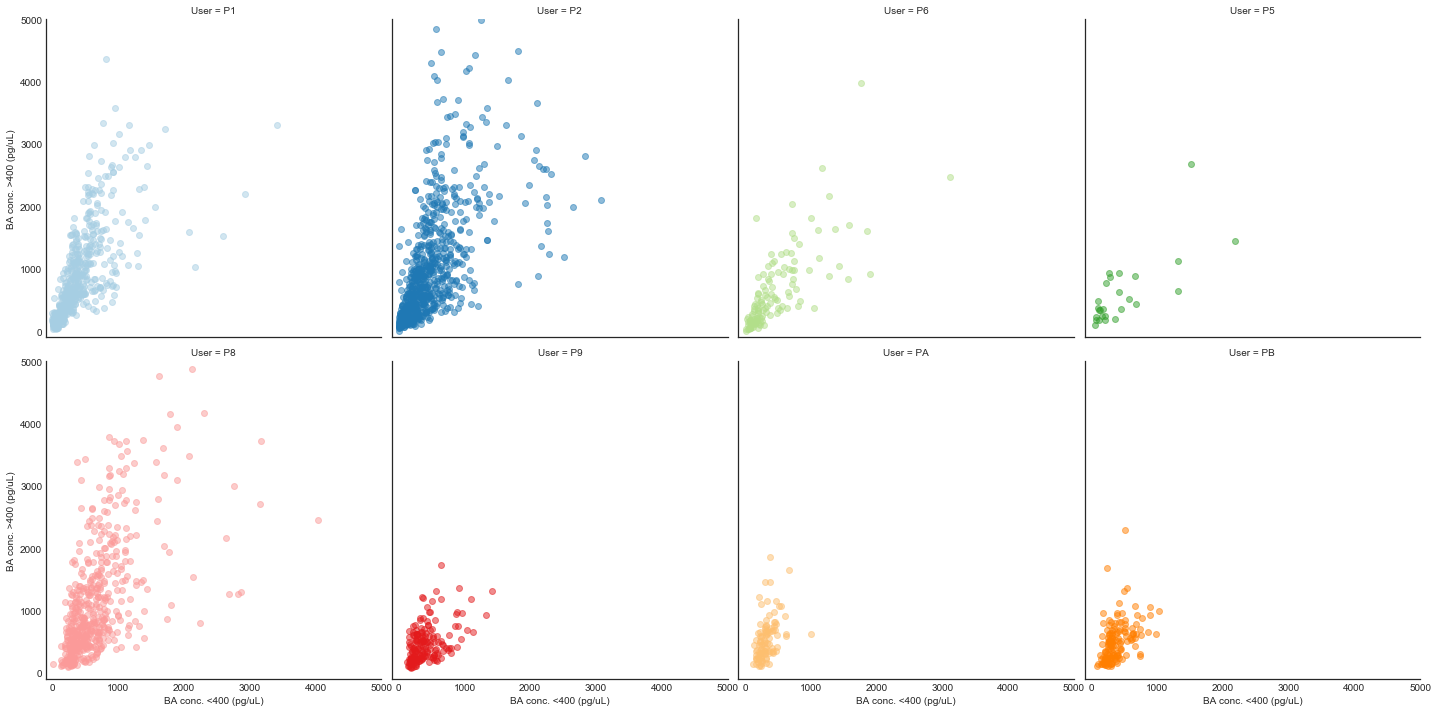

In [7]:
sns.lmplot(x = 'BA conc. <400 (pg/uL)', y = 'BA conc. >400 (pg/uL)', data = df[(df['Trans'] == 'x')], fit_reg = False, 
           hue = 'User', col = 'User', scatter_kws = {'alpha':.5}, col_wrap = 4,palette = 'Paired')

plt.xlim(-100,5000)
plt.ylim(-100,5000)
#plt.savefig('BA_conc_by_User.png')

C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  This is separate from the ipykernel package so we can avoid doing imports until


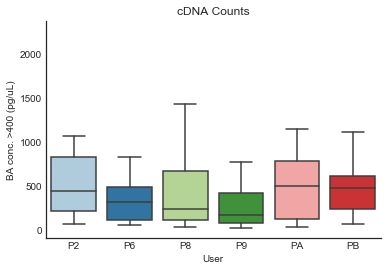

In [8]:
#this will focus on 1 month
sns.boxplot(x = 'User', y = 'BA conc. >400 (pg/uL)', 
               data = df[(df['BA conc. >400 (pg/uL)'] < 3000) & (df['Month'] == 12)].sort(columns = 'User'),
               fliersize = 0, palette = 'Paired').set_title('cDNA Counts')
sns.despine()
#plt.savefig('boxplot.png')

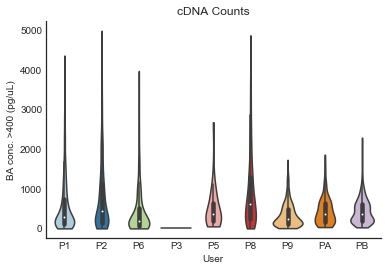

In [9]:
sns.violinplot(x = 'User', y = 'BA conc. >400 (pg/uL)', 
               data = df[df['BA conc. >400 (pg/uL)'] < 5000],
               scale = 'area', cut = 0, palette = 'Paired').set_title('cDNA Counts')
sns.despine()
#plt.savefig('violinplot_1.png')

### How about over time

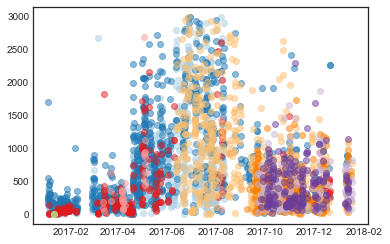

In [10]:
for user in df.User.unique():
    temp = df[(df['User'] == user) & (df['BA conc. >400 (pg/uL)'] < 3000)]
    plt.plot_date(temp['date_format'], temp['BA conc. >400 (pg/uL)'], 
                  color = colors[user], alpha = 0.5)

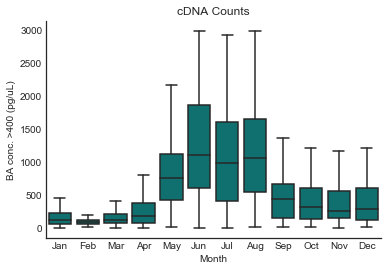

In [11]:
sns.boxplot(x = 'Month', y = 'BA conc. >400 (pg/uL)', 
               data = df[df['BA conc. >400 (pg/uL)'] < 3000],
               fliersize = 0, color = 'teal').set_title('cDNA Counts')
plt.xticks(np.arange(0,12),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
sns.despine()

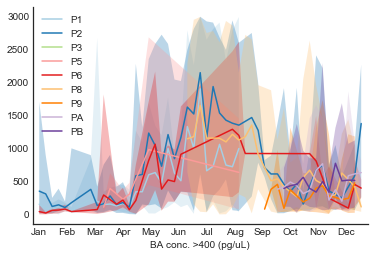

In [25]:
#only works for 2017 right now

for user in sorted(df['User'].unique()):
    temp = df[(df['User'] == user) & (df['BA conc. >400 (pg/uL)'] < 3000)]
    x = list(temp[temp['year'] == 2017]['week'].unique())
    
    y = [temp[temp['week'] == date]['BA conc. >400 (pg/uL)'].mean() for date in x]
    y_max = [temp[temp['week'] == date]['BA conc. >400 (pg/uL)'].max() for date in x]
    y_min = [temp[temp['week'] == date]['BA conc. >400 (pg/uL)'].min() for date in x]
    plt.fill_between(x, y_min,y_max, facecolor=colors[user], interpolate=True, alpha = 0.3)
    plt.plot(x,y, color = colors[user], linestyle = '-', marker = '', label = user)
    
sns.despine()
plt.xlim(0,52)
plt.xticks(np.arange(1,52,(52/12.)),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('BA conc. >400 (pg/uL)')

plt.legend()

In [14]:
columns  = [
            'date', 
            'preps',
            'cells', 
            'avg_ratio',
            'avg_<400',
            'avg_>400', 
            'std_ratio', 
            'std_<400', 
            'std_>400',
            'min_ratio',
            'max_ratio'
           ]

df_date = pd.DataFrame(columns = columns )

for i, date in enumerate(df['Date'].unique()):
    temp = df[df['Date'] == date]
    preps = len(temp)
    cells = len(temp)
    avg_ratio = temp['Ratio >400/total'].mean()
    avg_L400 = temp['BA conc. <400 (pg/uL)'].mean()
    avg_G400 = temp['BA conc. >400 (pg/uL)'].mean()
    std_ratio = temp['Ratio >400/total'].std()
    std_L400 = temp['BA conc. <400 (pg/uL)'].std()
    std_G400 = temp['BA conc. >400 (pg/uL)'].std()
    min_ratio = temp['Ratio >400/total'].min()
    max_ratio = temp['Ratio >400/total'].max()
    df_date.loc[i] = [date, 
                       preps, 
                       cells, 
                       avg_ratio, 
                       avg_L400, 
                       avg_G400, 
                       std_ratio, 
                       std_L400, 
                       std_G400,
                       min_ratio,
                       max_ratio]

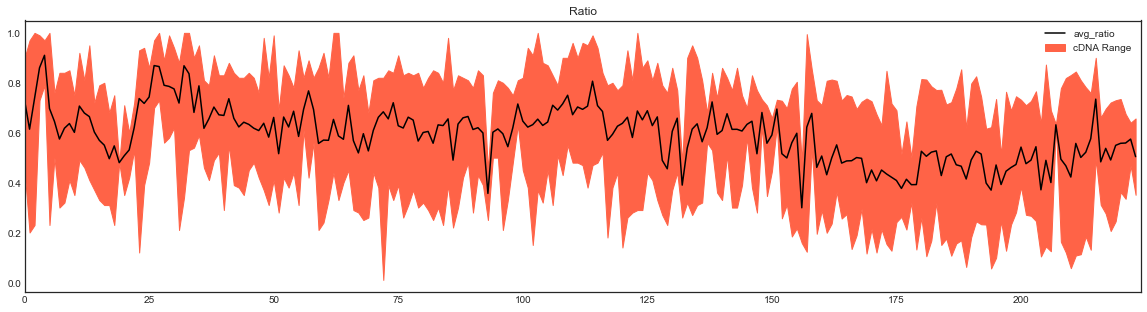

In [16]:
plt.figure(figsize =(20,5))
plt.plot(np.arange(0, len(df_date)), df_date['avg_ratio'], color = 'black')
"""plt.fill_between(np.arange(0, len(df_prep)), 
                df_prep['avg_ratio'] - df_prep['std_ratio'], 
                df_prep['avg_ratio'] + df_prep['std_ratio'],
                color = 'tomato',
                label = 'Standard Deviation')"""
plt.fill_between(np.arange(0, len(df_date)), 
                df_date['min_ratio'], df_date['max_ratio'],
                color = 'tomato',
                label = 'cDNA Range')
plt.xlim(0,len(df_date))
plt.title('Ratio')
plt.legend()plt.figure(figsize =(15,5))
plt.plot(np.arange(0, len(df_prep)), df_prep['avg_>400'], color = 'black')
plt.fill_between(np.arange(0, len(df_prep)), 
                df_prep['avg_>400'] - df_prep['std_>400'], 
                df_prep['avg_>400'] + df_prep['std_>400'],
                color = 'tomato', 
                label = 'Standard Deviation')
plt.xlim(0,len(df_prep))
plt.title('<400')
plt.legend()

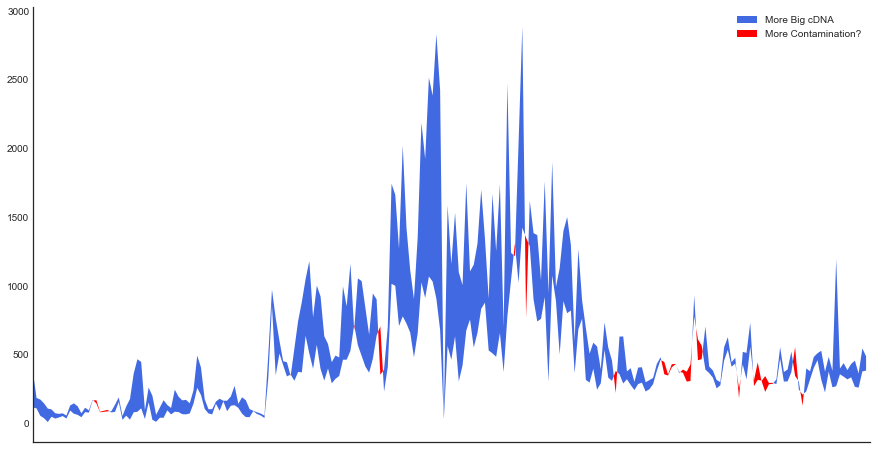

In [19]:

plt.figure(figsize =(15,8))

x = np.arange(0,len(df_date))
y1 = df_date['avg_<400']
y2 = df_date['avg_>400']

plt.fill_between(x, y1, y2, where=y2 >= y1, facecolor='royalblue', interpolate=True, label = 'More Big cDNA')
plt.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True, label = 'More Contamination?')

plt.xlim(0,len(df_date))
plt.legend()
#plt.title('cDNA Reads by Date')
#plt.ylabel('Number of Reads')
plt.xticks([])
sns.despine()
#plt.savefig('cDNA Reads by Date.png')

In [23]:
df_date['date'].max()

180117.0

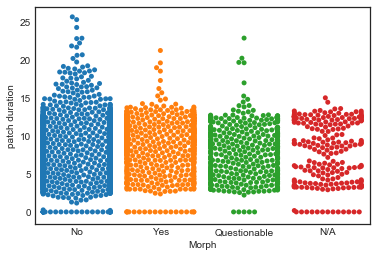

In [6]:
sns.swarmplot(x = 'Morph', y = 'patch duration', data = df)

### Avg Slice Health Rating

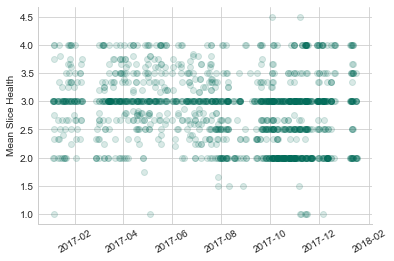

In [13]:
plt.figure(figsize = (6,4))
sh_df = df.groupby(['Slice (Lims ID?)']).mean().reset_index()
sh_df['date_format'] = sh_df['Date'].map(lambda x: pd.to_datetime(str(int(x)), format = '%y%m%d'))

sns.set_style('whitegrid')
plt.plot_date(sh_df['date_format'], sh_df['Slice health'], alpha = .15, color = '#046D5B')
#plt.plot_date(sh_df['date_format'], sh_df['Cell Health'], alpha = .15, color = '#C39D1A')

plt.xticks(rotation = 30)
plt.ylabel('Mean Slice Health')

sns.despine()
sns.set_style('white')

### Cell Health Rating

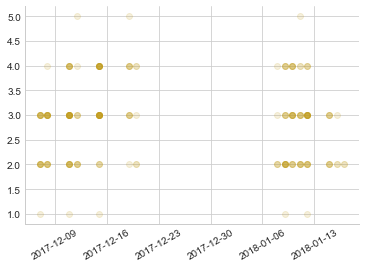

In [14]:
sns.set_style('whitegrid')
#plt.plot_date(sh_df['date_format'], sh_df['Slice health'], alpha = .15, color = '#046D5B')
plt.plot_date(df['date_format'], df['Cell Health'], alpha = .15, color = '#C39D1A')
plt.xticks(rotation = 30)
sns.despine()
sns.set_style('white')

### Differences between Slice Health Rating and Cell Health Rating

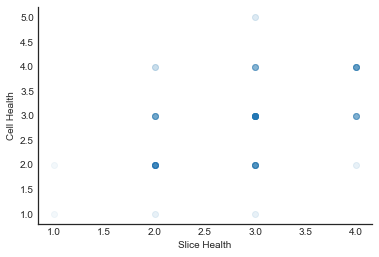

In [15]:
plt.scatter(df[df['Cell Health'].notnull()]['Slice health'], 
            df[df['Cell Health'].notnull()]['Cell Health'], 
            alpha = 1./len(df[df['Cell Health'].notnull()])*10)
plt.xlabel('Slice Health')
plt.ylabel('Cell Health')
sns.despine()

### User Numbers

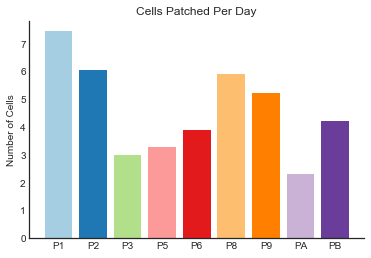

In [16]:
for i, user in enumerate(sorted(df['User'].unique())):
    cells = float(len(df[df['User'] == user]))
    days = len(df[df['User'] == user]['Date'].unique())
    plt.bar(i, cells/days, color = colors[user])
plt.xticks(np.arange(0,i +1),sorted(df['User'].unique()))
plt.ylabel('Number of Cells')
plt.title('Cells Patched Per Day')
sns.despine()

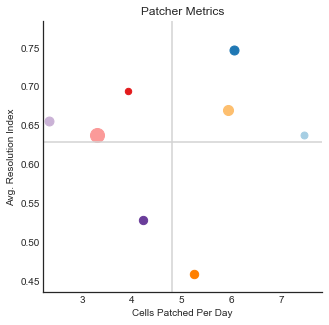

In [17]:
cpd = []
resolutions = []
plt.figure(figsize=(5,5))

for user in sorted(df[df['User'] != 'P3']['User'].unique()):
    cells = float(len(df[df['User'] == user]))
    days = len(df[df['User'] == user]['Date'].unique())
    cpd.append(cells/days)
    resolution = df[df['User'] == user]['Resolution index'].mean()
    resolutions.append(resolution)
    
    #size of dot will be percentage of cells patched that have transcriptomics and morphologies
    size = len(df[(df['User'] == user) & (df['Trans'] == 'x') & (df['Morph'] == 'Yes')])/cells
    plt.scatter(cells/days, resolution, label = user, s = size*500, color = colors[user])

#add in lines for quadrants based on the mean values
plt.plot([0,10],[np.mean(resolutions),np.mean(resolutions)], color = 'lightgrey')
plt.plot([np.mean(cpd),np.mean(cpd)],[0,1], color = 'lightgrey')

#adjust the scope of the viz by the vaules so the quadrant lines don't scew it
plt.xlim(np.min(cpd)*.95, np.max(cpd)*1.05)
plt.ylim(np.min(resolutions)*.95, np.max(resolutions)*1.05)

plt.xlabel('Cells Patched Per Day')
plt.ylabel('Avg. Resolution Index')
plt.title('Patcher Metrics')
sns.despine()
#plt.legend(loc='center left', bbox_to_anchor=(.9, 0.3))
#plt.savefig('Patcher Metrics.png')

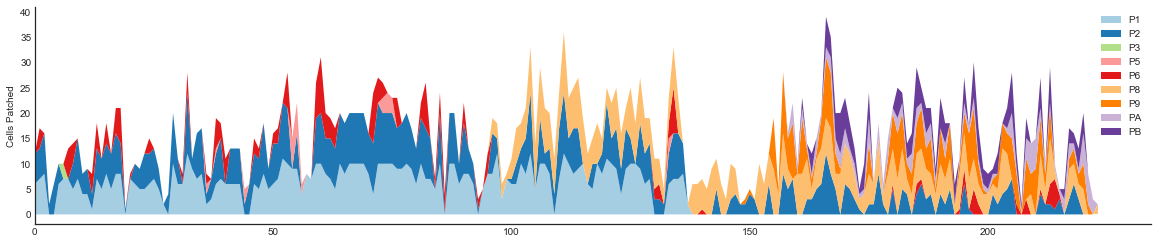

In [18]:
plt.figure(figsize = (20,4))
x = np.arange(0,len(df["Date"].unique()))
bottom = np.zeros(len(df['Date'].unique()))
for i, user in enumerate(sorted(df['User'].unique())):
    y = [len(df[(df['Date'] == date) & (df['User'] == user)]) for date in df['Date'].unique()]
    y2 = y+bottom
    plt.fill_between(x, bottom, y2,where=y2 > bottom, facecolor=colors[user], interpolate=True, label = user)
                #color = colors[user], label = user)
    bottom += y

plt.legend()
sns.despine()
plt.xlim(0,)
plt.ylabel("Cells Patched")
#plt.title('PrePipeline Patching')
#plt.savefig('Patches over time.png')

### What happened to the cDNA numbers over the summer?

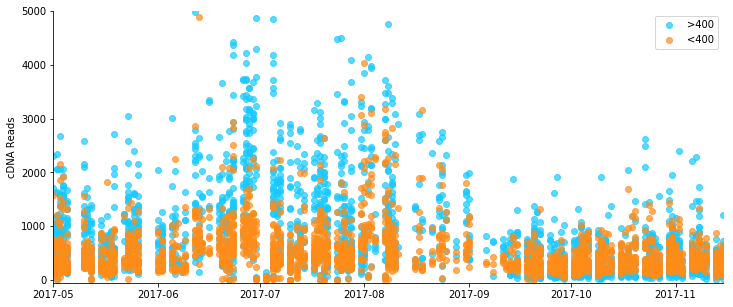

In [68]:
plt.figure(figsize = (12,5))
plt.plot_date(df['date_format'], df['BA conc. >400 (pg/uL)'], alpha = .7, color = '#17c9ff', label = '>400')
plt.plot_date(df['date_format'], df['BA conc. <400 (pg/uL)'], alpha = .7, color = '#ff8c19', label = '<400')
plt.legend()
plt.ylim(-50,5000)
plt.xlim(datetime.strptime('170501', '%y%m%d'),datetime.strptime('171115', '%y%m%d'))
sns.despine()
plt.ylabel('cDNA Reads')
#plt.savefig('cDNA over time.png')

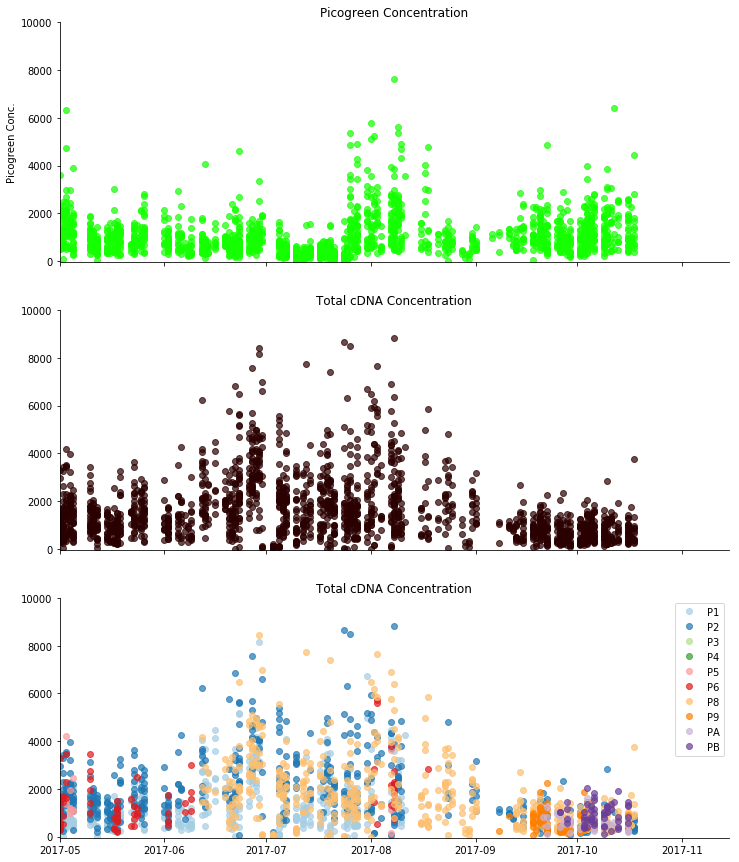

In [98]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (12,15), sharex = True)

ax1.plot_date(df['date_format'], df['Picogreen'], alpha = .7, color = '#14FF00', label = 'Picogreen Conc.')
ax2.plot_date(df['date_format'], df['Conc.'], alpha = .7, color = '#2B0000', label = 'Total Concentration')
for user in df['User'].unique():
    ax3.plot_date(df[df['User'] == user]['date_format'], df[df['User'] == user]['Conc.'], alpha = .7, color = colors[user], label = user)

#plt.plot_date([datetime.strptime('170901', '%y%m%d'),datetime.strptime('170901', '%y%m%d')], [-1000,16000], color = 'black', linestyle = 'solid')
plt.legend()
ax1.set_ylim(-50,10000)
ax2.set_ylim(-50,10000)
ax3.set_ylim(-50,10000)

ax1.set_title('Picogreen Concentration')
ax2.set_title('Total cDNA Concentration')
ax3.set_title('Total cDNA Concentration')

plt.xlim(datetime.strptime('170501', '%y%m%d'),datetime.strptime('171115', '%y%m%d'))
sns.despine()
ax1.set_ylabel('Picogreen Conc.')
#plt.savefig('brian_fig.png')

### Add in the Cre Lines

In [59]:
df['Cre_line_guess'] = df['File'].map(lambda x: str(x).split('-')[0])
df['Cre_line_guess'] = df['Cre_line_guess'].map(lambda x: str(x).split(' ')[0])

In [ ]:
#run me to get the cre lines
df['Cre_line_guess'].unique()

In [62]:
#place file names that aren't cre lines in this list to filter them out, run this until data cleansed 
bad_cre = ['294816.03.01.01','294816.03.01.02', '294816.03.01.03', '294816.03.01.04', 
           'cortical', 'pipette', 'internal', 'aCSF', 
        'nan',  'rusty', 'Rm_160727_01',
       'Rm_160727_04', 'brl_170112_03', 'brl_170112_02', 'brl_170112_01',
       'Rm_160727_02', 'Rm_160727_03', 'brl_170807_01', 'brl_170807_03',
       'brl_170807_02', 'WT', 'na', 'brl_141029_05', 'brl_141029_04',
       'brl_141029_03', 'brl_141029_02', '141125', 'brl_141029_06',
       'brl_150323_06', 'brl_141029_07', 'brl_150324_03',
       'brl_150324_02', 'brl_150324_01', 'brl_150323_07', 'brl_150908_01',
       'no', '150101', '1500108', 'brl_150323_05', 'brl_150323_04',
       'brl_150323_03', 'brl_150323_02', 'brl_150323_01', 'brl_160726_01',
       'brl_160726_02', 'brl_141029_01', 'brl_141107_02', 'brl_150406_07',
       'brl_150406_05', 'brl_150406_04', 'brl_150406_03', 'brl_150406_21',
       'brl_150406_01', 'brl_141107_01', 'brl_150908_02', 'brl_150908_03',
       'brl_150908_04', 'brl_150908_05', 'brl_150909_01', 'brl_141107_06',
       'brl_141107_05', 'brl_141107_04', 'brl_141107_03', 'brl_150909_02',
       'brl_150909_03', 'brl_150909_04', 'brl_150909_05', 'brl_150909_06',
       'brl_150909_07', 'brl_141106_06', 'brl_141106_05', 'brl_141106_04',
       'brl_150325_06', 'brl_150324_05', 'brl_150324_07', 'brl_150324_06',
       'brl_150324_04', 'brl_150325_07', 'brl_141105_01', 'brl_141106_03',
       'brl_141106_02', 'brl_141106_01', 'brl_141105_03b', 'brl_150325_09',
       'brl_150325_08', 'brl_141105_03a', 'brl_150406_08', 'brl_150220_03',
       'brl_150220_02', 'brl_150220_01', 'brl_150220_04', '150109', 'Nrsr',
       'brl_170407_07', 'brl_170410_01', 'brl_170410_02', 'brl_150220_06',
       'brl_150220_05', '150123', '150211', 'failure', '']

for cre in bad_cre:
    df['Cre_line_guess'] = df['Cre_line_guess'].apply(lambda x: None if x == cre else x)

df['Cre_line_guess'] = df['Cre_line_guess'].apply(lambda x: 'Vip' if x == 'VIp' else x)

df['Cre_line_guess'].unique()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

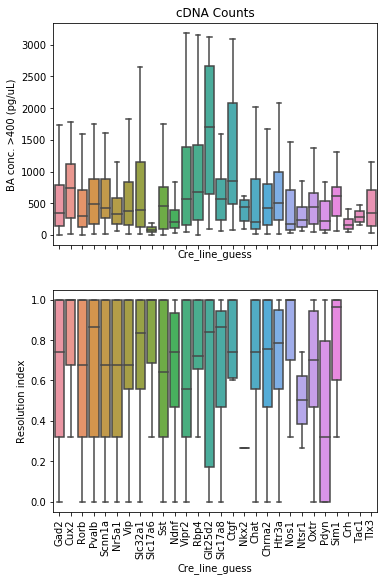

In [64]:
f, axes = plt.subplots(2,1, figsize = (5.8,9), sharex = True)
sns.boxplot(x = 'Cre_line_guess', y = 'BA conc. >400 (pg/uL)', 
               data = df[df['BA conc. >400 (pg/uL)'] < 3200],
               fliersize = 0, ax = axes[0]).set_title('cDNA Counts')
#ax1.set_xticks(rotation = 90)
sns.boxplot(x = 'Cre_line_guess', y = 'Resolution index', 
               data = df[df['BA conc. >400 (pg/uL)'] < 3200],
               fliersize = 0, ax = axes[1])
plt.xticks(rotation=90)

C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  import sys


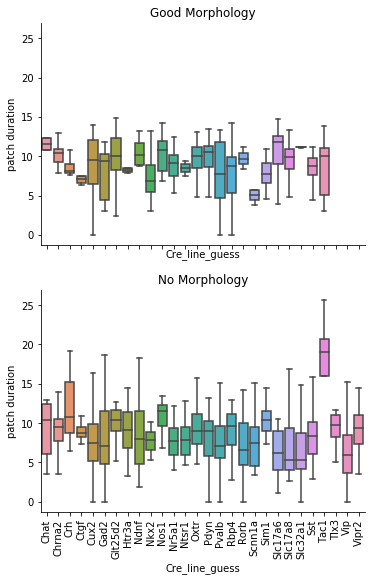

In [66]:
f, axes = plt.subplots(2,1, figsize = (5.8,9), sharex = True,sharey=True)
sns.boxplot(x = 'Cre_line_guess', y = 'patch duration', 
               data = df[df['Morph'] =='Yes'].sort(columns = 'Cre_line_guess'),
               fliersize = 0, ax = axes[0]).set_title('Good Morphology')
#ax1.set_xticks(rotation = 90)
sns.boxplot(x = 'Cre_line_guess', y = 'patch duration', 
               data = df[df['Morph'] =='No'].sort(columns = 'Cre_line_guess'),
               fliersize = 0, ax = axes[1]).set_title('No Morphology')
plt.xticks(rotation=90)
sns.despine()
#f.savefig('morph.png')

## This will take time to build a new dataframe
#### and doesn't really show anything

In [72]:
temp = df.sort(columns = ['User', 'Date']).reset_index(drop = True)

users = []
temp['order'] = None
for i in range(len(temp)):
    if temp['User'].iloc[i] in users:
        order = (i-df_length) * (1.0/len(temp[temp["User"] == user]))
        temp['order'].iloc[i] = round(order,2)
    else:
        users.append(temp['User'].iloc[i])
        
        #don't want to include this length in the count or it will give negative values for P1
        df_length = -len(temp[temp['User'] == (temp['User'].iloc[i])])
        for user in users:
            df_length += len(temp[temp['User'] == user])
        
        order = (i-df_length) * (1.0/len(temp[temp["User"] == user]))
        temp['order'].iloc[i] = round(order,2)


C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.
C:\Users\aarono\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(-100, 5000)

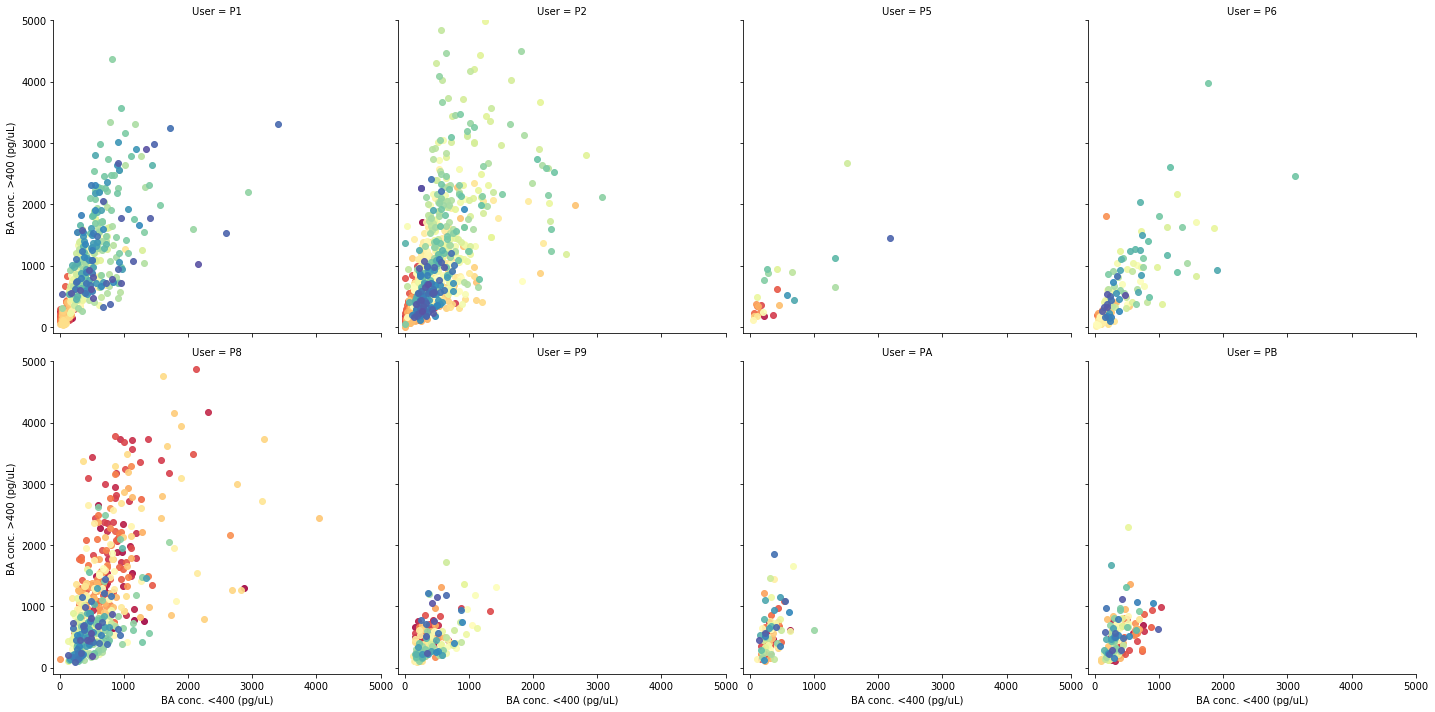

In [73]:
sns.lmplot(x = 'BA conc. <400 (pg/uL)', y = 'BA conc. >400 (pg/uL)', data = temp[temp['Trans'] == 'x'], fit_reg = False, 
           hue = 'order', col = 'User', scatter_kws = {'alpha':.9}, col_wrap = 4, legend = False, palette = 'Spectral')
plt.xlim(-100,5000)
plt.ylim(-100,5000)
#plt.savefig('cDNA_learning_curve.png')